In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')

In [4]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [9]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [11]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [12]:
train1 = train.dropna()
train1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [13]:
train1['Transported'].replace({False: 0, True: 1},inplace=True)
train1['Transported']

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

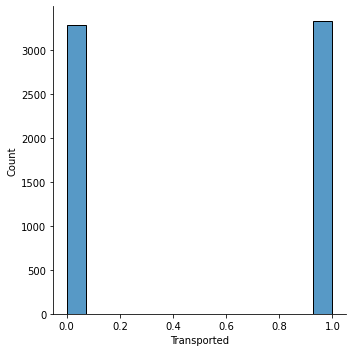

In [14]:
sns.displot(train1['Transported'])

In [15]:
trans_count = train1['Transported'].value_counts()
trans_count

1    3327
0    3279
Name: Transported, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


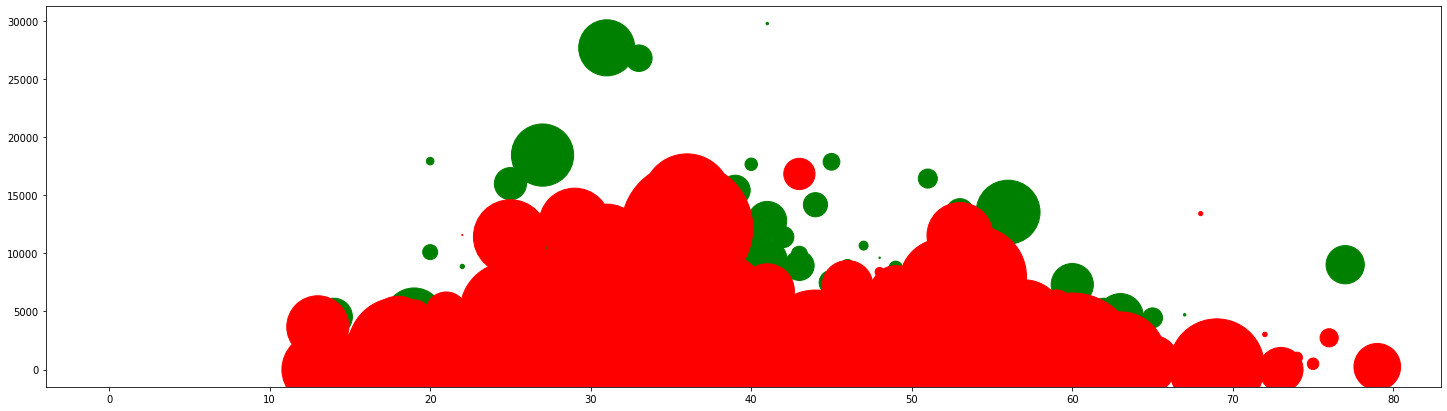

In [16]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(train1[train1['Transported'] == 1]['Age'], train1[train['Transported'] == 1]['FoodCourt'], c='green', s=train1[train1['Transported'] == 1]['VRDeck'])
ax.scatter(train1[train1['Transported'] == 0]['Age'], train1[train['Transported'] == 0]['FoodCourt'], c='red', s=train1[train1['Transported'] == 0]['VRDeck']);

In [17]:
target = train1['Transported']

train1.drop(['Transported'],axis=1, inplace=True)
train1

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


## Combine Train1 & Test

In [18]:
combi = train1.append(test)
combi

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [19]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   10883 non-null  object 
 1   HomePlanet    10796 non-null  object 
 2   CryoSleep     10790 non-null  object 
 3   Cabin         10783 non-null  object 
 4   Destination   10791 non-null  object 
 5   Age           10792 non-null  float64
 6   VIP           10790 non-null  object 
 7   RoomService   10801 non-null  float64
 8   FoodCourt     10777 non-null  float64
 9   ShoppingMall  10785 non-null  float64
 10  Spa           10782 non-null  float64
 11  VRDeck        10803 non-null  float64
 12  Name          10789 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [20]:
combi.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Data Cleaning

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)

date = pd.Timestamp('2200-01-01')

for col in combi:
    if combi[col].dtype=="object":
        combi[col].fillna("not listed", inplace=True)
    if combi[col].dtype=="int":
        #X[col].fillna(X[col].mode()[0], inplace=True)
        combi[col].fillna(combi[col].mean(), inplace=True)
        #combi[col] = combi[col].astype.int()
    if combi[col].dtype=='float':
       #X[col].fillna(X[col].mean(), inplace=True)
       combi[col] = imp.fit_transform(combi[col].values.reshape(-1,1))
    if combi[col].dtype=="datetime64[ns]":
        combi[col].fillna(date, inplace=True)
combi

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,not listed,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.802539,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,not listed,28.802539,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [22]:
combi.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

## Analyse features

#### Home Planet

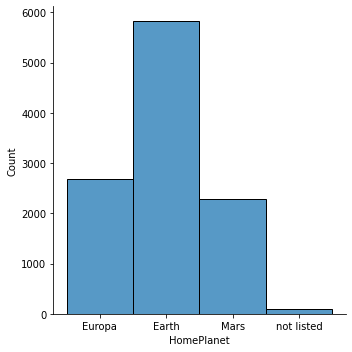

In [23]:
sns.displot(combi['HomePlanet'])

In [24]:
home_count = combi['HomePlanet'].value_counts()
home_count

Earth         5829
Europa        2675
Mars          2292
not listed      87
Name: HomePlanet, dtype: int64

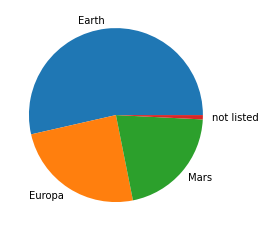

In [25]:
mylabels = ["Earth", "Europa", "Mars", "not listed"]
plt.pie(home_count, labels=mylabels)
plt.show()

In [26]:
combi['HomePlanet'].replace({"Earth": 1, "Europa": 2, "Mars": 3, "not listed": 4},inplace=True)
combi['HomePlanet']

0       2
1       1
2       2
3       2
4       1
       ..
4272    1
4273    1
4274    3
4275    2
4276    1
Name: HomePlanet, Length: 10883, dtype: int64

In [27]:
combi['CryoSleep'][combi['CryoSleep'] == 'not listed'] = False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
print(combi.iloc[6674])

PassengerId         0156_01
HomePlanet                3
CryoSleep             False
Cabin                F/34/P
Destination     TRAPPIST-1e
Age               28.802539
VIP                   False
RoomService             0.0
FoodCourt               0.0
ShoppingMall            0.0
Spa                     0.0
VRDeck                  0.0
Name            Tures Upead
Name: 68, dtype: object


In [29]:
combi['CryoSleep'].replace({False: 0, True: 1})

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: int64

In [30]:
sleep_count = combi['CryoSleep'].value_counts()
sleep_count

False    7007
True     3876
Name: CryoSleep, dtype: int64

#### Destination

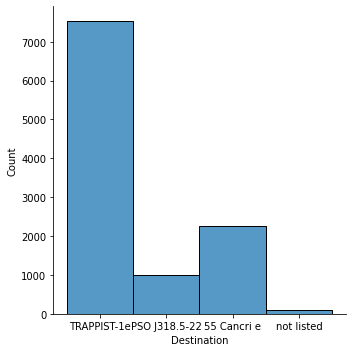

In [31]:
sns.displot(combi['Destination'])

In [32]:
dest_count = combi['Destination'].value_counts()
dest_count

TRAPPIST-1e      7532
55 Cancri e      2248
PSO J318.5-22    1011
not listed         92
Name: Destination, dtype: int64

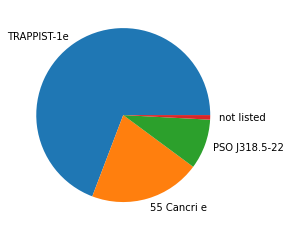

In [33]:
mylabels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22", "not listed"]
plt.pie(dest_count, labels=mylabels)
plt.show() 

In [34]:
combi['Destination'].replace({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3, "not listed": 4},inplace=True)
combi['Destination']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    2
4275    4
4276    3
Name: Destination, Length: 10883, dtype: int64

#### Age

In [35]:
combi['Age_group'] = pd.cut(x=combi['Age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
combi['Age_group']

0       young adult
1       young adult
2        middle age
3       young adult
4             child
           ...     
4272    young adult
4273     middle age
4274    young adult
4275    young adult
4276     middle age
Name: Age_group, Length: 10883, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

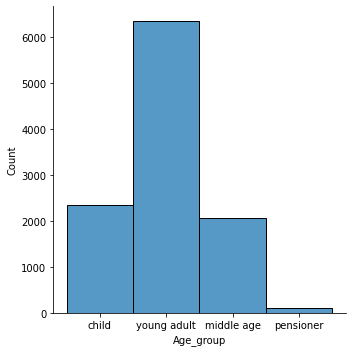

In [36]:
sns.displot(combi['Age_group'])

In [37]:
age_count = combi['Age_group'].value_counts()
age_count

young adult    6359
child          2340
middle age     2074
pensioner       110
Name: Age_group, dtype: int64

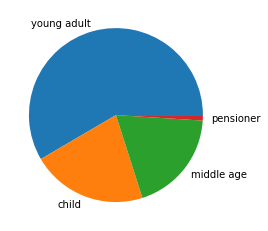

In [38]:
mylabels = ["young adult", "child", "middle age", "pensioner"]
plt.pie(age_count, labels=mylabels)
plt.show() 

In [39]:
combi['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
combi['Age_group']

0       1
1       1
2       3
3       1
4       2
       ..
4272    1
4273    3
4274    1
4275    1
4276    3
Name: Age_group, Length: 10883, dtype: int64

#### VIP

for dtype obj to int64

In [40]:
combi['VIP'][combi['VIP'] == 'not listed'] = False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
combi['VIP'].replace({False: 0, True: 1})

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VIP', ylabel='Density'>

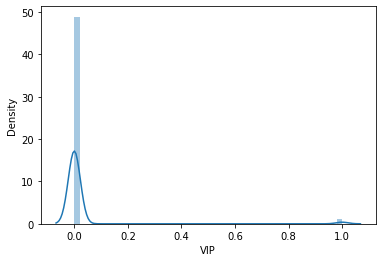

In [42]:
sns.distplot(combi['VIP'])

In [43]:
vip_count = combi['VIP'].value_counts()
vip_count

False    10647
True       236
Name: VIP, dtype: int64

In [44]:
combi['VIP'] = combi['VIP'].astype(int)
combi['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

### Room Service

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RoomService'>

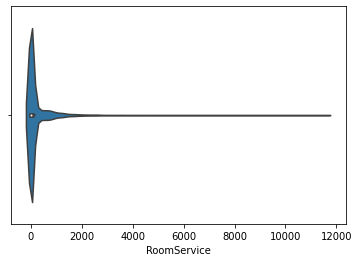

In [45]:
sns.violinplot(combi['RoomService'])

In [46]:
combi['Room_Service_group'] = pd.cut(x=combi['RoomService'], bins=[-1, 2000, 8000, 12000], labels=['low', 'med', 'high'])
combi['Room_Service_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Room_Service_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

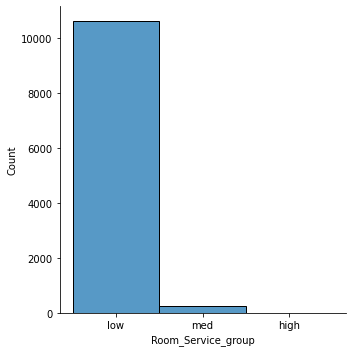

In [47]:
sns.displot(combi['Room_Service_group'])


In [48]:
rm_service_count = combi['Room_Service_group'].value_counts()
rm_service_count

low     10624
med       253
high        6
Name: Room_Service_group, dtype: int64

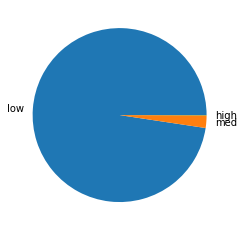

In [49]:
mylabels = ["low", "med", "high"]
plt.pie(rm_service_count, labels=mylabels)
plt.show()

In [50]:
combi['Room_Service_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Room_Service_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Room_Service_group, Length: 10883, dtype: int64

### Food Court

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FoodCourt'>

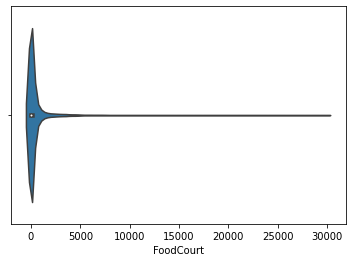

In [51]:
sns.violinplot(combi['FoodCourt'])

In [52]:
combi['Food_Court_group'] = pd.cut(x=combi['FoodCourt'], bins=[-1, 5000, 20000, 30000], labels=['low', 'med', 'high'])
combi['Food_Court_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Food_Court_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

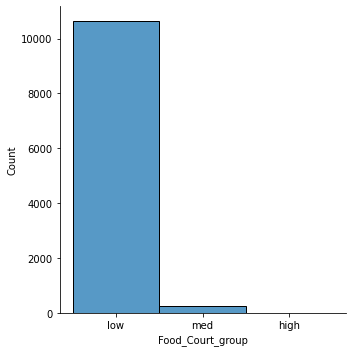

In [53]:
sns.displot(combi['Food_Court_group'])

In [54]:
fd_court_count = combi['Food_Court_group'].value_counts()
fd_court_count

low     10640
med       235
high        8
Name: Food_Court_group, dtype: int64

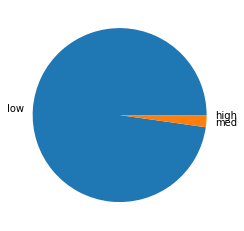

In [55]:
mylabels = ["low", "med", "high"]
plt.pie(fd_court_count, labels=mylabels)
plt.show()

In [56]:
combi['Food_Court_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Food_Court_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Food_Court_group, Length: 10883, dtype: int64

### Shopping Mall

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ShoppingMall'>

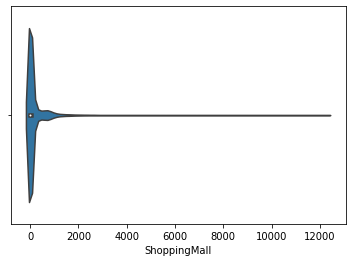

In [57]:
sns.violinplot(combi['ShoppingMall'])

In [58]:
combi['Shopping_group'] = pd.cut(x=combi['ShoppingMall'], bins=[-1, 2000, 8000, 13000], labels=['low', 'med', 'high'])
combi['Shopping_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Shopping_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

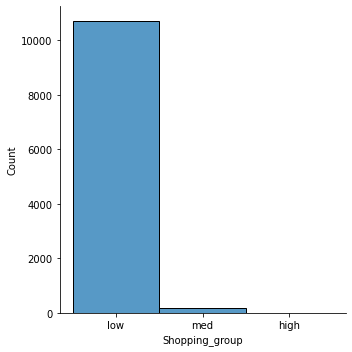

In [59]:
sns.displot(combi['Shopping_group'])

In [60]:
shopping_count = combi['Shopping_group'].value_counts()
shopping_count

low     10709
med       166
high        8
Name: Shopping_group, dtype: int64

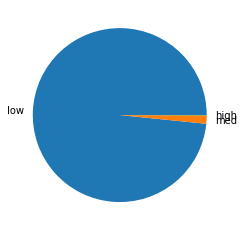

In [61]:
mylabels = ["low", "med", "high"]
plt.pie(shopping_count, labels=mylabels)
plt.show()

In [62]:
combi['Shopping_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Shopping_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Shopping_group, Length: 10883, dtype: int64

### Spa

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Spa'>

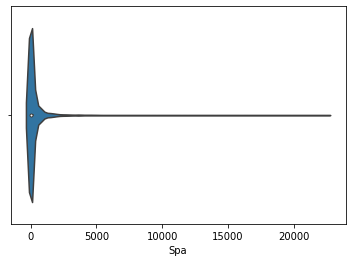

In [63]:
sns.violinplot(combi['Spa'])

In [64]:
combi['Spa_group'] = pd.cut(x=combi['Spa'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
combi['Spa_group']

0       low
1       low
2       med
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Spa_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

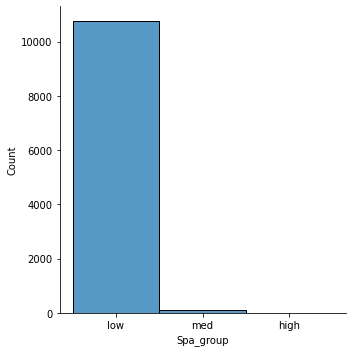

In [65]:
sns.displot(combi['Spa_group'])

In [66]:
spa_count = combi['Spa_group'].value_counts()
spa_count

low     10762
med       112
high        9
Name: Spa_group, dtype: int64

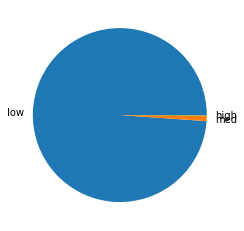

In [67]:
mylabels = ["low", "med", "high"]
plt.pie(spa_count, labels=mylabels)
plt.show()

In [68]:
combi['Spa_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Spa_group']

0       1
1       1
2       2
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Spa_group, Length: 10883, dtype: int64

### VR Deck

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VRDeck'>

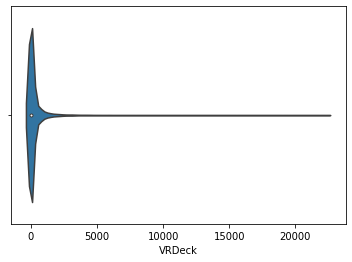

In [69]:
sns.violinplot(combi['VRDeck'])

In [70]:
combi['VR_group'] = pd.cut(x=combi['VRDeck'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
combi['VR_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: VR_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

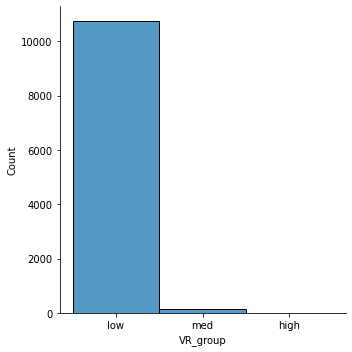

In [71]:
sns.displot(combi['VR_group'])

In [72]:
vr_count = combi['VR_group'].value_counts()
vr_count

low     10746
med       127
high       10
Name: VR_group, dtype: int64

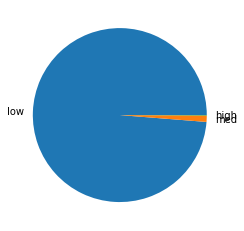

In [73]:
mylabels = ["low", "med", "high"]
plt.pie(vr_count, labels=mylabels)
plt.show()

In [74]:
combi['VR_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['VR_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: VR_group, Length: 10883, dtype: int64

### Assign features

In [75]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         10883 non-null  object 
 1   HomePlanet          10883 non-null  int64  
 2   CryoSleep           10883 non-null  object 
 3   Cabin               10883 non-null  object 
 4   Destination         10883 non-null  int64  
 5   Age                 10883 non-null  float64
 6   VIP                 10883 non-null  int64  
 7   RoomService         10883 non-null  float64
 8   FoodCourt           10883 non-null  float64
 9   ShoppingMall        10883 non-null  float64
 10  Spa                 10883 non-null  float64
 11  VRDeck              10883 non-null  float64
 12  Name                10883 non-null  object 
 13  Age_group           10883 non-null  int64  
 14  Room_Service_group  10883 non-null  int64  
 15  Food_Court_group    10883 non-null  int64  
 16  Shopp

#### Define X and y

In [76]:
features = ["HomePlanet", "CryoSleep", "Destination", "Age_group", "Room_Service_group", "Food_Court_group", "Shopping_group", "Spa_group", "VR_group"]

y = target
X = combi[features][: len(train1)]
X_test = combi[features][len(train1) :]

#### Heatmap

<AxesSubplot:>

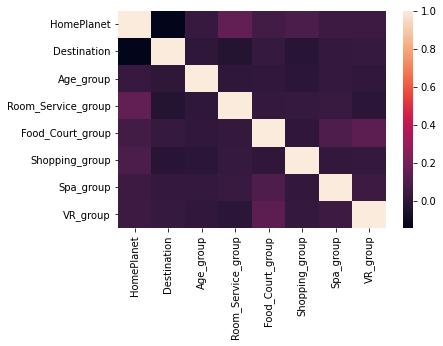

In [77]:
cmap = combi[features].corr()
sns.heatmap(cmap)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((5945, 9), (661, 9), (5945,), (661,), (4277, 9))

### Select Model

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7391084945332212


### Predict validation

In [80]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.7443267776096822


### Confusion matrix

In [81]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))

[[292  36]
 [133 200]]


### Predict on X_test

In [82]:
predictions = model.predict(X_test)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
predictions

array(['True', 'False', 'True', ..., 'True', 'False', 'True'], dtype='<U5')

### Prepare and submit

In [83]:
submission['Transported'] = predictions
submission.to_csv('submission.csv', index=False)
my_submission = pd.read_csv("submission.csv")
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
